In [1]:
import pymde
import torch

In [2]:
depth = 9
n_items = 2**(depth + 1) - 1

edges = []
stack = [0]
while stack:
    root = stack.pop()
    first_child = root*2 + 1
    second_child = root*2 + 2
    if first_child < n_items:
        edges.append((root, first_child))
        stack.append(first_child)
    if second_child < n_items:
        edges.append((root, second_child))
        stack.append(second_child)

tree = pymde.Graph.from_edges(torch.tensor(edges))

In [3]:
shortest_paths_graph = pymde.preprocess.graph.shortest_paths(tree)

In [4]:
# these are the indices of the nodes that we will pin in place
leaves = torch.arange(2**depth) + 2**depth - 1

In [5]:
import math

radius = 20

# pin the root to be at (0, 0), and the leaves to be spaced uniformly on a circle
angles = torch.linspace(0, 2*math.pi, leaves.numel() + 1)[1:]
positions = radius * torch.stack([torch.sin(angles), torch.cos(angles)], dim=1)
positions

tensor([[ 2.4543e-01,  1.9998e+01],
        [ 4.9082e-01,  1.9994e+01],
        [ 7.3614e-01,  1.9986e+01],
        ...,
        [-4.9081e-01,  1.9994e+01],
        [-2.4542e-01,  1.9998e+01],
        [ 3.4969e-06,  2.0000e+01]])

In [8]:
leaves

tensor([ 511,  512,  513,  514,  515,  516,  517,  518,  519,  520,  521,  522,
         523,  524,  525,  526,  527,  528,  529,  530,  531,  532,  533,  534,
         535,  536,  537,  538,  539,  540,  541,  542,  543,  544,  545,  546,
         547,  548,  549,  550,  551,  552,  553,  554,  555,  556,  557,  558,
         559,  560,  561,  562,  563,  564,  565,  566,  567,  568,  569,  570,
         571,  572,  573,  574,  575,  576,  577,  578,  579,  580,  581,  582,
         583,  584,  585,  586,  587,  588,  589,  590,  591,  592,  593,  594,
         595,  596,  597,  598,  599,  600,  601,  602,  603,  604,  605,  606,
         607,  608,  609,  610,  611,  612,  613,  614,  615,  616,  617,  618,
         619,  620,  621,  622,  623,  624,  625,  626,  627,  628,  629,  630,
         631,  632,  633,  634,  635,  636,  637,  638,  639,  640,  641,  642,
         643,  644,  645,  646,  647,  648,  649,  650,  651,  652,  653,  654,
         655,  656,  657,  658,  659,  6

In [6]:
anchor_constraint = pymde.Anchored(anchors=leaves, values=positions)

In [7]:
anchor_constraint

Mar 11 05:06:07 PM: Fitting a anchored embedding into R^2, for a graph with 1023 items and 522753 edges.
Mar 11 05:06:07 PM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Mar 11 05:06:08 PM: iteration 000 | distortion 1.100900 | residual norm 0.00392407 | step length 19952.5 | percent change 17.2599
Mar 11 05:06:08 PM: Converged in 011 iterations, with residual norm 4.90181e-06
Mar 11 05:06:08 PM: Finished fitting in 1.031 seconds and 11 iterations.
Mar 11 05:06:08 PM: average distortion 0.496 | residual norm 4.9e-06


<AxesSubplot:>

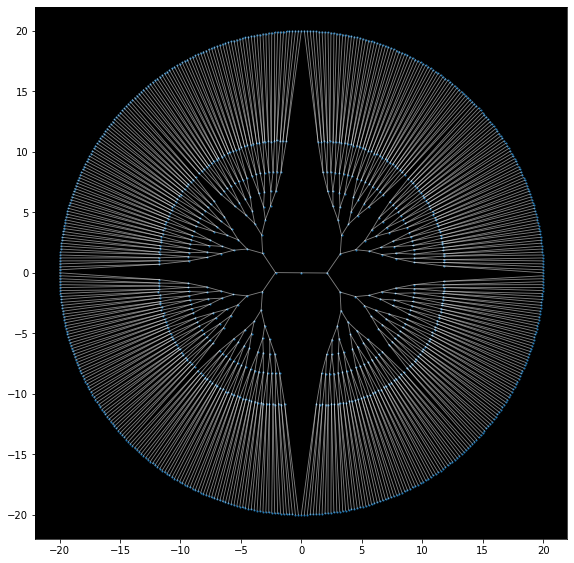

In [9]:
mde = pymde.MDE(
    n_items,
    embedding_dim=2,
    edges=shortest_paths_graph.edges,
    distortion_function=pymde.losses.WeightedQuadratic(shortest_paths_graph.distances),
    constraint=anchor_constraint,
)
mde.embed(snapshot_every=1, verbose=True)
mde.plot(edges=edges)